# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [278]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

In [176]:
z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))

In [177]:
df.isna().mean()

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

In [178]:
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [179]:
df.shape

(30181, 15)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [181]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


In [182]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,Age,Height,Weight,Year
ID,1.00,-0.00,-0.02,-0.01,0.01
Age,-0.00,1.00,0.10,0.16,0.10
Height,-0.02,0.10,1.00,0.80,0.03
Weight,-0.01,0.16,0.80,1.00,0.01
Year,0.01,0.10,0.03,0.01,1.00


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [183]:
pd.crosstab(df['Sex'], df['Medal'])

Medal,Bronze,Gold,Silver
Sex,,,
F,3475,3437,3438
M,6673,6730,6428


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [184]:
df[df['Medal'] == 'Gold']['Team'].value_counts()

United States                              2075
Soviet Union                                961
Germany                                     508
East Germany                                368
Russia                                      356
                                           ... 
Philadelphia Turngemeinde, Philadelphia       1
Merope                                        1
Costa Rica                                    1
Ecuador                                       1
Burundi                                       1
Name: Team, Length: 157, dtype: int64

**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [185]:
pd.crosstab(df['Sport'], df['Sex'])

Sex,F,M
Sport,,
Alpine Skiing,180,174
Archery,100,106
Art Competitions,0,2
Athletics,1239,2409
Badminton,73,81
Baseball,0,333
Basketball,390,610
Beach Volleyball,35,33
Biathlon,147,241


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [186]:
data = df[(df['Sport'] == 'Ice Hockey') & (df['Sex'] == 'F')]['Age'].describe()
print(f'mean: {data[1]}\n std: {data[2]}')

mean: 24.42
 std: 4.360463907080281


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [187]:
df[(df['Medal'] == 'Bronze') & (df['Sex'] == 'F')]['Team'].value_counts()

United States                  360
Germany                        226
Canada                         196
Soviet Union                   186
Australia                      186
                              ... 
Hong Kong                        1
Individual Olympic Athletes      1
Mozambique                       1
Ukraine-1                        1
Bahamas                          1
Name: Team, Length: 115, dtype: int64

**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

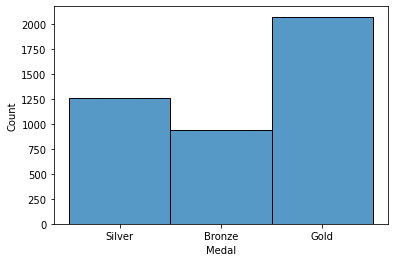

In [365]:
sns.histplot(data=df[df['Team'] == 'United States'], x='Medal');

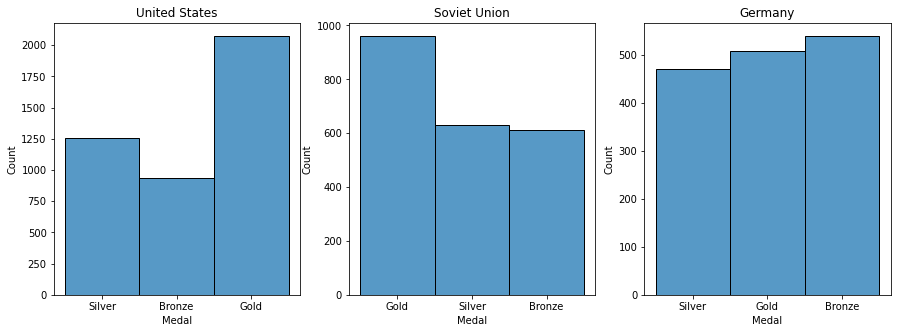

In [385]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].title.set_text('United States')
axes[1].title.set_text('Soviet Union')
axes[2].title.set_text('Germany')
sns.histplot(ax=axes[0], data=df[df['Team'] == 'United States'], x='Medal');
sns.histplot(ax=axes[1], data=df[df['Team'] == 'Soviet Union'], x='Medal');
sns.histplot(ax=axes[2], data=df[df['Team'] == 'Germany'], x='Medal');

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

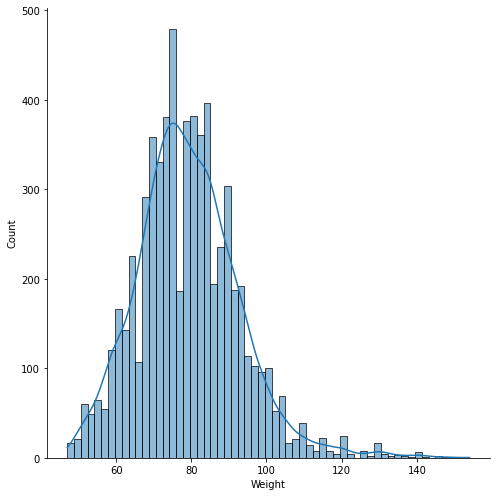

In [285]:
x = df[(df['Sex'] == 'M') & (df['Medal'] == 'Silver')]['Weight']
sns.displot(x, kde=True, height=7);

**8. Постройте boxplot для возраста участника в зависимости от медали**

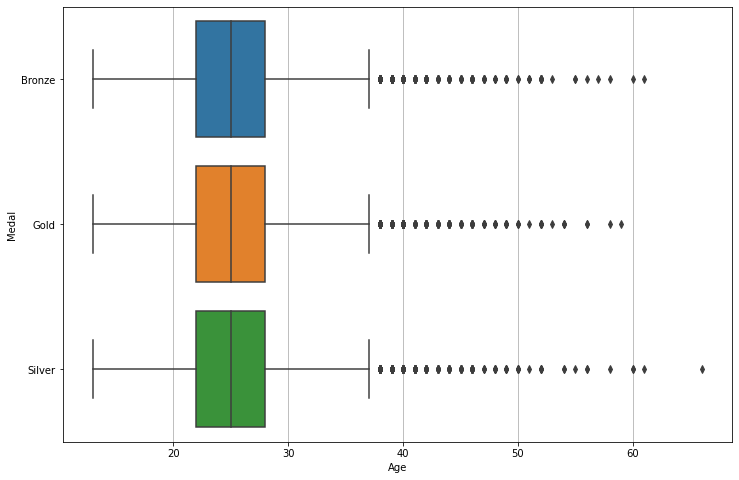

In [327]:
plt.figure(figsize=(12, 8))
plt.grid()
sns.boxplot(x='Age', y='Medal', data=df, orient="h");

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

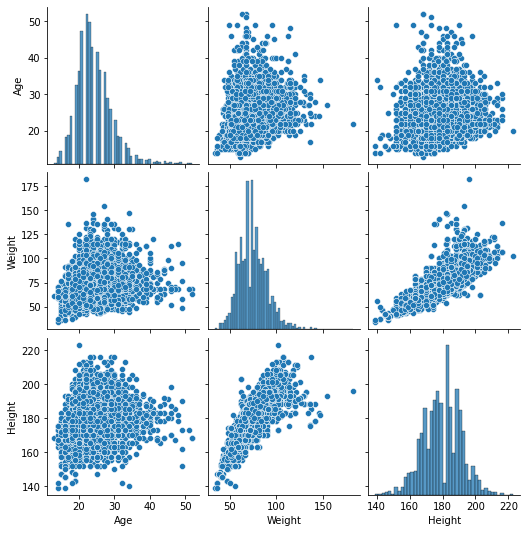

In [333]:
sns.pairplot(df[df['Team'] == 'United States'][['Age', 'Weight', 'Height']]);

In [386]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [394]:
data = df.copy()

In [395]:
med = {'Gold': 1, 'Silver': 2, 'Bronze': 3}
s = {'M': 1, 'F': 0}
data['Sex'] = data['Sex'].map(s)
data['Medal'] = data['Medal'].map(med)

In [401]:
cat_col = ['Event', 'NOC']
data.drop(labels=cat_col, inplace=True, axis=1)

In [402]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal
40,16,Juhamatti Tapio Aaltonen,1,28.0,184.0,85.0,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,3
41,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,3
42,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,1
44,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,1
48,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,1


In [404]:
cols = ['Sex', 'Age', 'Height', 'Weight']
target_col = 'Medal'
new_cols = cols + [target_col]

In [405]:
data = data[new_cols]

In [410]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
X = pca.fit_transform(data[cols])

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [415]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [416]:
accuracy_score(y_test, y_pred)

0.34570150737121086

In [417]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': list(range(1, 11)),
          'metric': ['manhattan', 'euclidean'],
          'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
clf_grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [418]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

In [419]:
pred = clf_grid.predict(X_test)
accuracy_score(y_test, pred)

0.3495113466953785

In [421]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [423]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.34984263707139307

In [424]:
tree_params = {'max_depth': list(range(1, 5)), 
               'min_samples_leaf': list(range(1, 5))}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [425]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4]},
             verbose=True)

In [426]:
print(f'best_params: {tree_grid.best_params_}', f'best_score: {tree_grid.best_score_}', sep='\n')

best_params: {'max_depth': 1, 'min_samples_leaf': 1}
best_score: 0.34745688632421873
